In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bh_molecule.instruments.vis133m import Vis133M
from bh_molecule.dataio import load_v00_wavelengths
from bh_molecule.physics import BHModel

In [2]:
from bh_molecule.fit import BHFitter

In [3]:
FITS = './133mVis_169626.fits'
wavecal_csv = './133mVis_wavcal.csv'
s26 = Vis133M(FITS,wavecal_csv)
s26.set_scale(0.0001837)
s26.set_dark(frame=49, channel=43)
s26.set_time_linspace(0, 10)
#s26.plot_band_map((432.5,433.85))

In [4]:
v00 = load_v00_wavelengths()
model = BHModel(v00)

,Parameter,Value
0,C,0.262 ± 0.002
1,T_rot,3600 ± 100 K
2,dx,(101 ± 7)e-5 nm
3,w_inst,0.0245 ± 0.0002 nm
4,base,0.0876 ± 0.0002
5,I_R7,(25 ± 3)e-5
6,I_R8,(30 ± 3)e-5


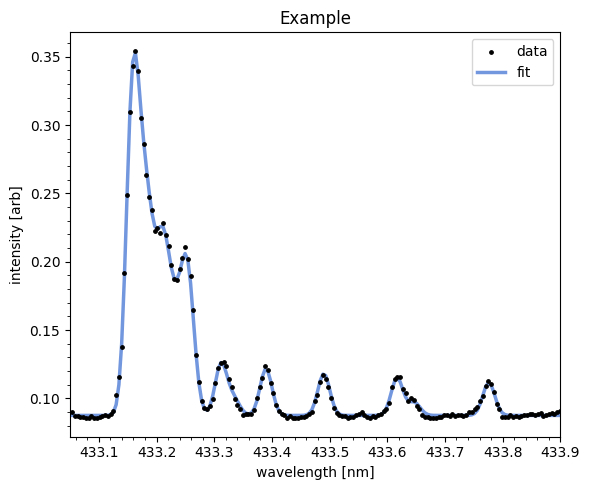

In [5]:
fitr = BHFitter(s26, model, warm_start=True, weight="none")
res = fitr.fit(frame=38, channel=31)
display(res["summary"])
_ = fitr.plot_single(res, title="Example")